Import the requests, pandas>=1.0.0, matplotlib, and scipy libraries before using this notebook.

In [1]:
import requests
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import gamma
import numpy as np

Ensure that you have a recent version of pandas (>= 1.0.0).

In [2]:
print("pandas version", pd.__version__)
assert pd.__version__[0] >= "1", "To use this notebook, upgrade to the newest version of pandas. See https://pandas.pydata.org/pandas-docs/stable/getting_started/install.html for details."

pandas version 1.0.3


The helper methods in c3aidatalake.py convert a JSON response from the C3.ai APIs to a Pandas DataFrame. You may wish to view the code in c3aidatalake.py before using the quickstart examples.

In [3]:
import c3aidatalake

# Mobility

In [12]:
mobility_trends = c3aidatalake.evalmetrics(
    "outbreaklocation",
    {
        "spec" : {
            "ids" : ["Cook_Illinois_UnitedStates"],
            "expressions" : [
                "Google_ParksMobility",
                "Google_GroceryMobility",
                "Google_RetailMobility"
              ],
            "start" : "2020-02-15",
            "end" : "2020-07-15",
            "interval" : "DAY",
        }
    },
    get_all = True
)

mobility_trends

,dates,Cook_Illinois_UnitedStates.Google_RetailMobility.data,Cook_Illinois_UnitedStates.Google_RetailMobility.missing,Cook_Illinois_UnitedStates.Google_GroceryMobility.data,Cook_Illinois_UnitedStates.Google_GroceryMobility.missing,Cook_Illinois_UnitedStates.Google_ParksMobility.data,Cook_Illinois_UnitedStates.Google_ParksMobility.missing
0,2020-02-15,105,0,101,0,117,0
0,2020-02-16,109,0,102,0,140,0
0,2020-02-17,102,0,96,0,82,0
0,2020-02-18,101,0,100,0,106,0
0,2020-02-19,101,0,98,0,101,0
...,...,...,...,...,...,...,...
0,2020-07-10,83,0,96,0,158,0
0,2020-07-11,81,0,98,0,204,0
0,2020-07-12,83,0,95,0,267,0
0,2020-07-13,86,0,94,0,176,0


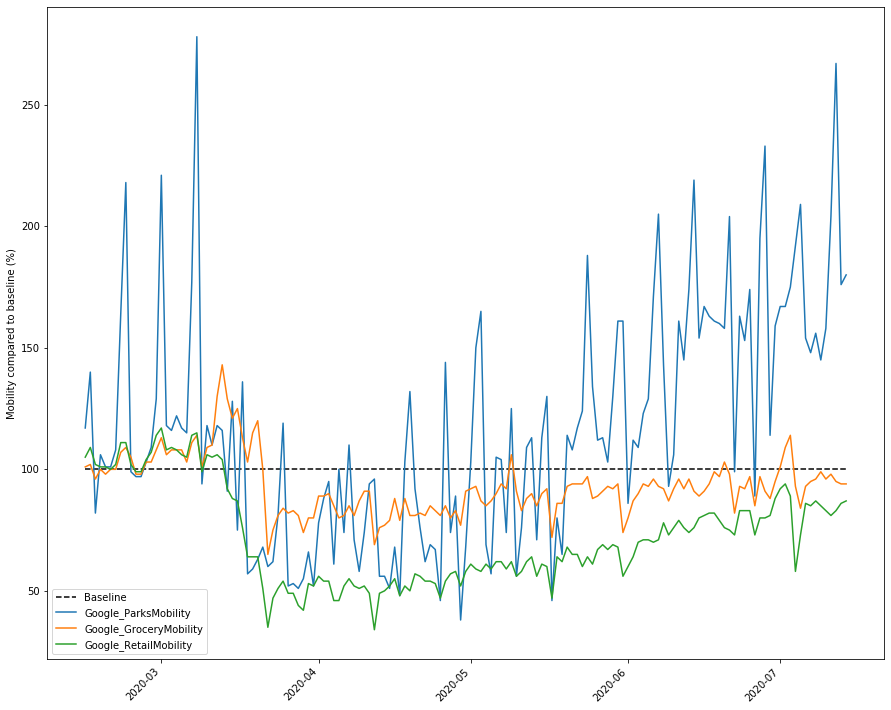

In [13]:
plt.figure(figsize = (15, 12))
plt.plot(
    mobility_trends["dates"],
    [100 for d in mobility_trends["dates"]],
    label = "Baseline",
    linestyle = "dashed",
    color = "black"
)
plt.plot(
    mobility_trends["dates"],
    mobility_trends["Cook_Illinois_UnitedStates.Google_ParksMobility.data"],
    label = "Google_ParksMobility"
)
# New
plt.plot(
    mobility_trends["dates"],
    mobility_trends["Cook_Illinois_UnitedStates.Google_GroceryMobility.data"],
    label = "Google_GroceryMobility"
)

plt.plot(
    mobility_trends["dates"],
    mobility_trends["Cook_Illinois_UnitedStates.Google_RetailMobility.data"],
    label = "Google_RetailMobility"
)

plt.legend()
plt.xticks(rotation = 45, ha = "right")
plt.ylabel("Mobility compared to baseline (%)")
plt.show()

### Explanation:
Before the pandemic started GroceryMobility and RetailMobility was above 100. Around May, people started going out again which is evident from the gGroceryMobility and RetailMobility graphs.